# Global Green Energy Part 2: Geographic & Economic Patterns 🌍

Building on our clustering work, we're shifting focus to spatial and economic relationships in renewable energy adoption. This analysis explores whether geography, wealth, and other structural factors create predictable patterns in how countries embrace clean electricity.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# load in data
raw_data = pd.read_csv('global_sustainable_energy_data.csv')

In [10]:
#display(raw_data.sample(4))
raw_data.info()

# data looks good, let's visuailise it. 
df = raw_data.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

In [25]:
# Filter latest year with non-null renewables
df_latest = (
    df.dropna(subset=["Electricity from renewables (TWh)"])
    .sort_values("Year")
    .groupby("Entity")
    .tail(1)
)

# Rename country column to 'country' for compatibility
df_latest = df_latest.rename(columns={"Entity": "country"})

# Plot
fig = px.choropleth(
    df_latest,
    locations="country",
    locationmode="country names",
    color="Electricity from renewables (TWh)",
    hover_name="country",
    color_continuous_scale="Viridis",
    title="Renewable Electricity Production by Country (Most Recent Year)"
)
fig.update_layout(
    geo=dict(showframe=False, showcoastlines=False),
    width=1600,  # 👈 Wider
    height=600,  # 👈 Taller
    margin={"r":0,"t":50,"l":0,"b":0}
)
fig.show()


## Mapping the Global Green Transition

Moving from rankings to geographic visualization reveals patterns that raw numbers miss:
- **Spatial clustering** - renewable leaders aren't randomly distributed across the globe, suggesting regional factors influence adoption rates
- **Development diversity** - the map should challenge assumptions about which types of economies drive renewable growth

In [23]:
# Filter latest year and exclude China
df_latest = (
    df.dropna(subset=["Electricity from renewables (TWh)"])
    .sort_values("Year")
    .groupby("Entity")
    .tail(1)
)

df_latest = df_latest[df_latest["Entity"] != "China"]  # 👈 Exclude China
df_latest = df_latest.rename(columns={"Entity": "country"})

# Plot map
fig = px.choropleth(
    df_latest,
    locations="country",
    locationmode="country names",
    color="Electricity from renewables (TWh)",
    hover_name="country",
    color_continuous_scale="Viridis",
    title="Renewable Electricity by Country (Excluding China)"
)
fig.update_layout(
    geo=dict(showframe=False, showcoastlines=False),
    width=1600,  # 👈 Wider
    height=600,  # 👈 Taller
    margin={"r":0,"t":50,"l":0,"b":0}
)
fig.show()


## Scale Effects in Energy Analysis

The China exclusion reveals important analytical considerations:
- **Outlier impact** - massive countries can dominate visualizations and hide patterns among other nations, making selective exclusion a useful analytical tool
- **Regional patterns emerge** - without China's overwhelming scale, we can better see how other regions compare and identify secondary renewable powerhouses

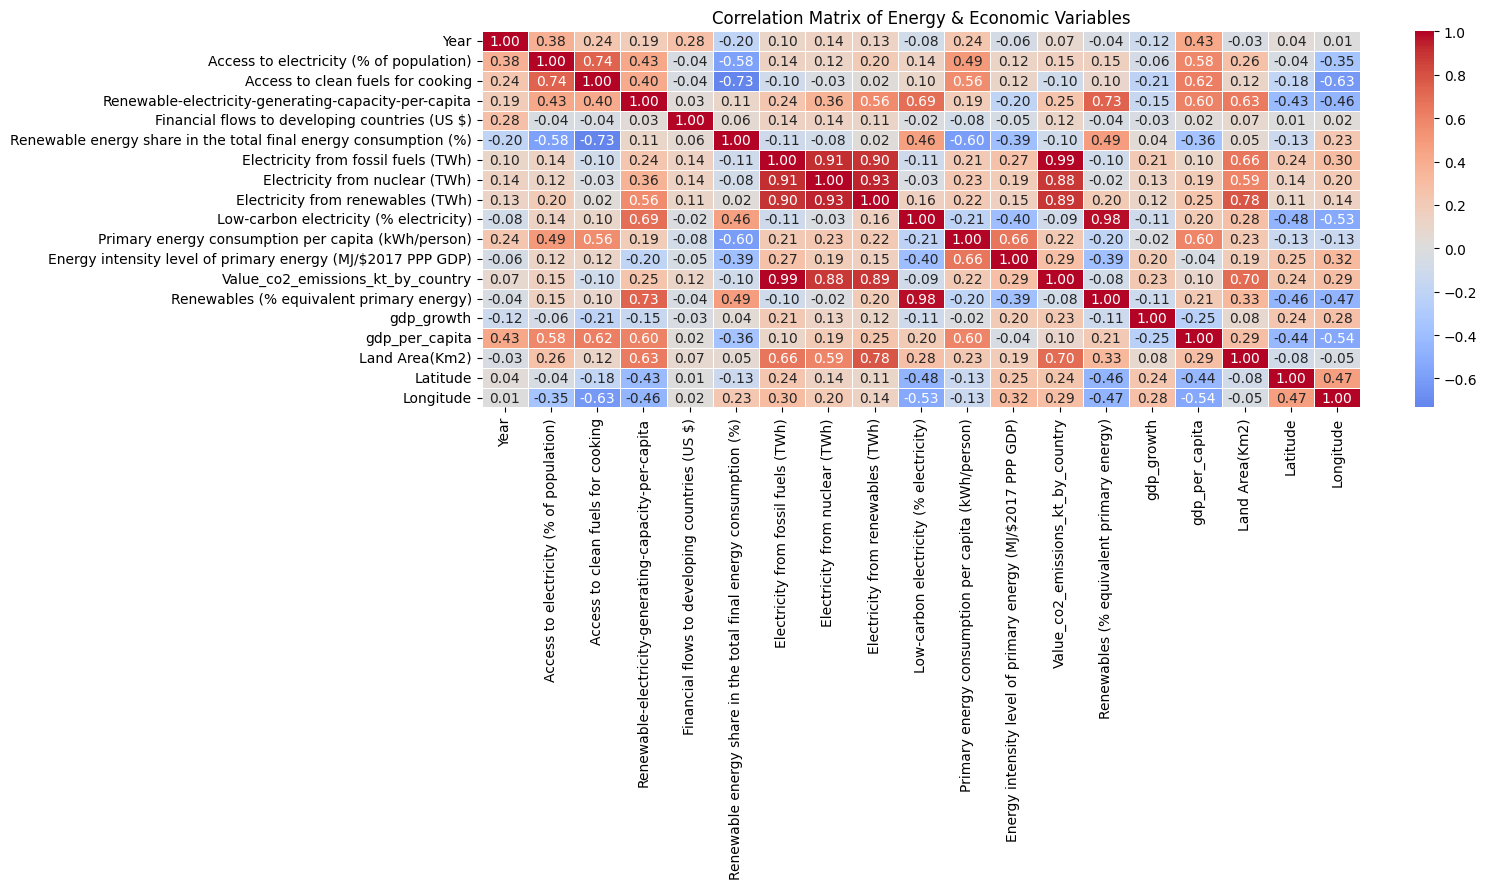

In [27]:
# Select only numeric columns
df_num = df.select_dtypes(include="number")

# Drop missing values (or fillna if needed)
df_corr = df_num.dropna()

# Correlation matrix
corr_matrix = df_corr.corr()

# Plot
plt.figure(figsize=(16, 9))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    linewidths=0.5
)
plt.title("Correlation Matrix of Energy & Economic Variables")
plt.tight_layout()
plt.show()


## Exploring Interconnected Systems

Energy systems don't exist in isolation - they're embedded in economic and social structures:
- **Hidden relationships** - correlation analysis can reveal unexpected connections between energy choices, economic development, and environmental outcomes
- **Policy insights** - understanding which variables move together helps identify leverage points for accelerating renewable transitions

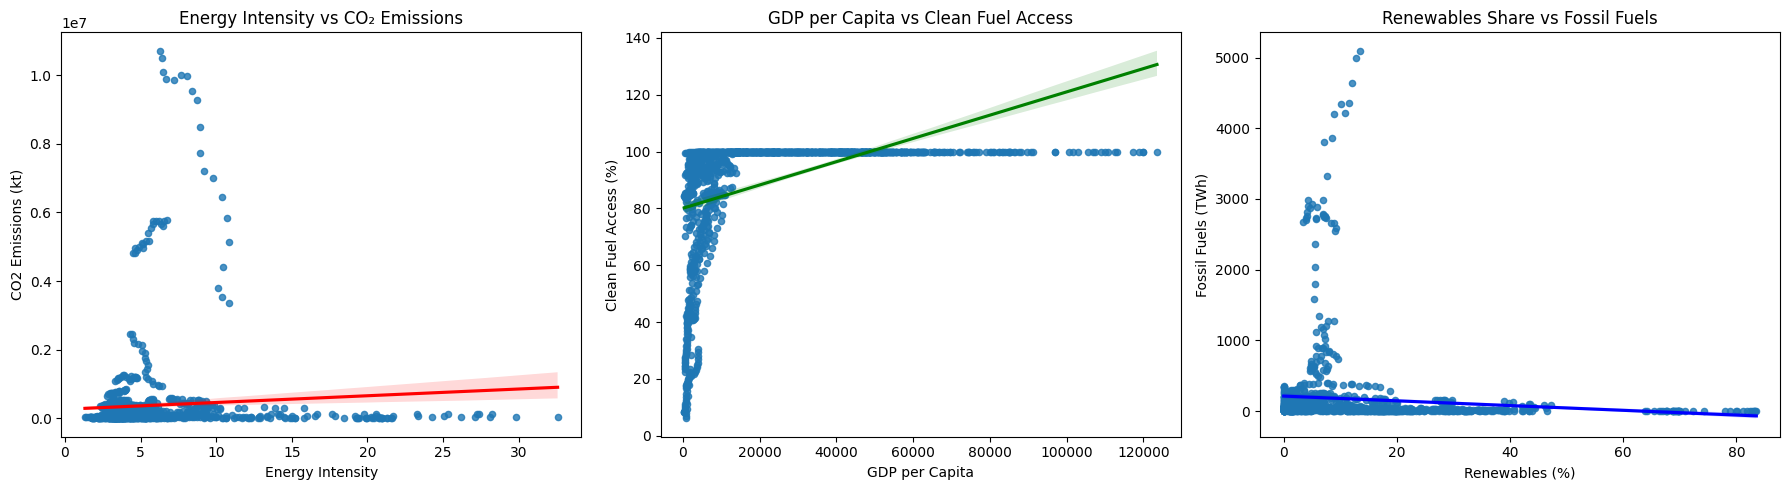

In [28]:
# Clean relevant columns
cols = [
    "Energy intensity level of primary energy (MJ/$2017 PPP GDP)",
    "Value_co2_emissions_kt_by_country",
    "gdp_per_capita",
    "Access to clean fuels for cooking",
    "Renewables (% equivalent primary energy)",
    "Electricity from fossil fuels (TWh)"
]

df_corrplot = df[cols].dropna()

# Rename columns for display
df_corrplot.columns = [
    "Energy Intensity",
    "CO2 Emissions (kt)",
    "GDP per Capita",
    "Clean Fuel Access (%)",
    "Renewables (%)",
    "Fossil Fuels (TWh)"
]

# Setup grid
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1
sns.regplot(
    data=df_corrplot,
    x="Energy Intensity",
    y="CO2 Emissions (kt)",
    ax=axs[0],
    scatter_kws={"s": 20},
    line_kws={"color": "red"}
)

# Plot 2
sns.regplot(
    data=df_corrplot,
    x="GDP per Capita",
    y="Clean Fuel Access (%)",
    ax=axs[1],
    scatter_kws={"s": 20},
    line_kws={"color": "green"}
)

# Plot 3
sns.regplot(
    data=df_corrplot,
    x="Renewables (%)",
    y="Fossil Fuels (TWh)",
    ax=axs[2],
    scatter_kws={"s": 20},
    line_kws={"color": "blue"}
)

# Titles
axs[0].set_title("Energy Intensity vs CO₂ Emissions")
axs[1].set_title("GDP per Capita vs Clean Fuel Access")
axs[2].set_title("Renewables Share vs Fossil Fuels")

plt.tight_layout()
plt.show()


## Drilling Down on Key Relationships

The correlation matrix points to specific relationships worth investigating deeper:
- **Strategic selection** - rather than drowning in correlation noise, focusing on theoretically important relationships yields clearer insights
- **Visual confirmation** - scatter plots with regression lines help validate whether correlation patterns hold up under closer inspection

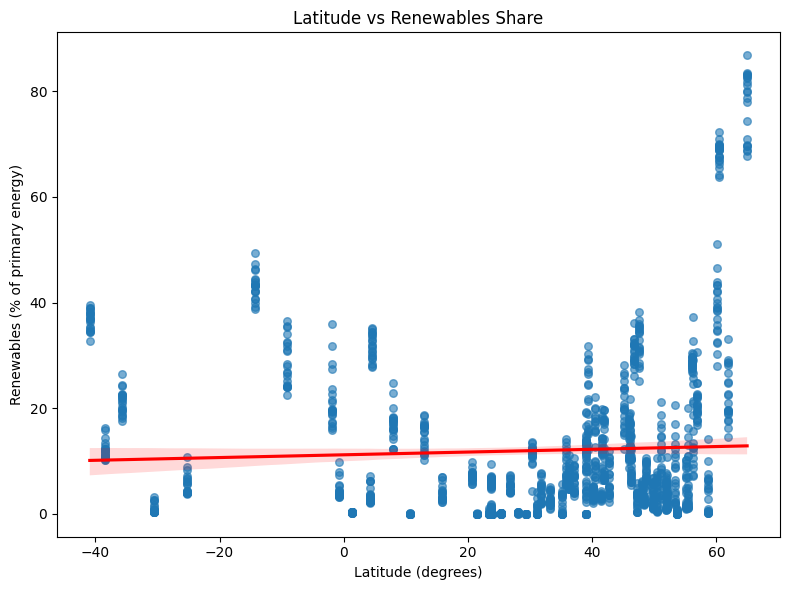

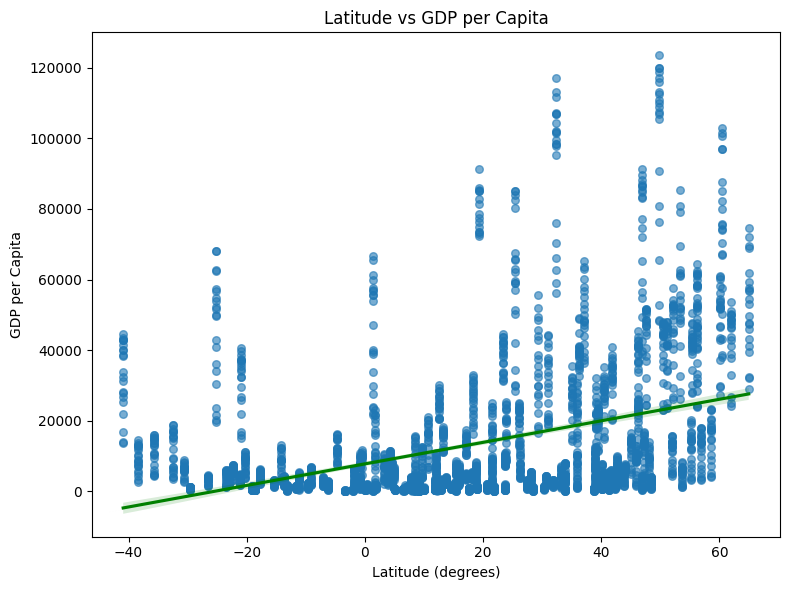

In [34]:
# Clean data
df_lat = df.dropna(subset=["Latitude", "Renewables (% equivalent primary energy)"])
df["Hemisphere"] = df["Latitude"].apply(lambda x: "Northern" if x >= 0 else "Southern")
df.groupby("Hemisphere")["Renewables (% equivalent primary energy)"].mean()


plt.figure(figsize=(8, 6))
sns.regplot(
    data=df_lat,
    x="Latitude",
    y="Renewables (% equivalent primary energy)",
    scatter_kws={"s": 30, "alpha": 0.6},
    line_kws={"color": "red"}
)
plt.title("Latitude vs Renewables Share")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Renewables (% of primary energy)")
plt.tight_layout()
plt.show()

df_gdp = df.dropna(subset=["Latitude", "gdp_per_capita"])

plt.figure(figsize=(8, 6))
sns.regplot(
    data=df_gdp,
    x="Latitude",
    y="gdp_per_capita",
    scatter_kws={"s": 30, "alpha": 0.6},
    line_kws={"color": "green"}
)
plt.title("Latitude vs GDP per Capita")
plt.xlabel("Latitude (degrees)")
plt.ylabel("GDP per Capita")
plt.tight_layout()
plt.show()


## Synthesis: Beyond Simple Patterns

The geographic and economic analysis reveals the complexity behind renewable adoption:
- **Multiple causation** - renewable transitions result from combinations of geographic endowments, economic development, and policy choices rather than single determining factors
- **Regional variation** - significant differences in how latitude and wealth correlate with renewable adoption across different parts of the world suggest local context matters enormously
- **Policy space** - the loose correlations indicate substantial room for policy intervention to accelerate transitions regardless of starting conditions
- **Measurement matters** - different ways of measuring renewable adoption (absolute vs percentage, electricity vs primary energy) can lead to different conclusions about what drives green transitions

## Geographic Determinism vs Choice

Testing whether physical geography shapes energy choices:
- **Climate hypothesis** - does latitude correlate with renewable adoption due to resource availability or climate urgency?
- **Development patterns** - exploring whether economic development follows geographic patterns that might influence energy policy